# Binomial Tests

In this assignment, we will explore the simplest kind of statistical test, tests where the distribution of data under a null hypothesis is binomial.  More sophisticated tests, like the z-tests (which use the normal distribution) and the t-tests (which use a generalization of the normal distribution called the t-distribution) can be viewed as elaborations on the themes set down here.

## Binomially Distributed Data

Recall the binomial distribution describes data generated when we observe a binary outcome (one of two things can happen) a fixed number of times, and the probability that one or another thing happens for each individual outcome does not change.

In each of the following situations, the resulting data *may be* binomially distributed.

  - If it is binomially distributed, give the parameters of the binomial distribution.
  - If it is not binomially distributed, describe why not.  If you can, give the correct distribution (if not, don't worry too much about it).

1. A large bucket contains 1256 six sided dice.  You dump all of them onto the ground (without losing any) and count how many 4's you see.

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
# 
n = 1256
p = 0.166
n*p

2. A large bucket contains 1256 dice with varying numbers of sides (some have four sides, some have six, some have 8, some have 10, some have 12, and some have 20).  You dump them all onto the ground (without losing any) and count how many 4's you see.


In [29]:
# This is not a bionimally distributed problem because we have dice
# of varrying size without knowing the distribution of each dice

3.  A magic the gathering deck (like a deck of cards) is made up of two types of cards: lands, and playables.  You have a forty card deck that contains the typical 17 lands.  You shuffle your deck, then draw the top card and see if it is a land.  You repeat this process 100 times, and count how often there is a land on top.

In [36]:
# yes its a binomial because we only have two types of cards
n=100
p = 17/40
n*p

42.5


4.  A magic the gathering deck is made up of two types of cards: lands, and playables.  You have a forty card deck that contains the typical 17 lands.  You shuffle your deck, draw a hand of 7 cards, and count the number of lands.

In [30]:
# cards are not replaced so having a land card alters your chance of
# drawing land card this means its a hypergeometric


#### The following two I'm gonna tell you up front: these ARE binomially distributed!  Convince yourself this is true, and compute the appropriate values of the parameters.

5. A large bucket contains 1256 six sided dice.  You dump all of them onto the ground, but this time you lose a random number of dice; there is a 10% chance you will lose any individual die.  You, again, count the number of 4's. 

In [37]:
n = 1256 *.9
p = .166
n*p

187.64640000000003

6.  A magic the gathering deck is made up of two types of cards: lands, and playables.  Although 17 lands is typical in a 40 card deck, it is sometimes correct to play 16 or 18 lands.  Say when you construct a deck, 80% of them contain 17 lands, 10% contain 16, and 10% contain 18.  You build a magic the gathering deck, shuffle it, and then look at the top card and see if it is a land.  You then repeat this process 100 times (including rebuilding the deck), and count how many times there was a land on top.

In [40]:
n = 100
p = (17/40)*.8 + (16/40)*.1 + (18/40)*.1
n*p

42.5

## Binomial Hypothesis Tests

In each of the following situations, a decision can be made by using a hypothesis test based on the binomial distribution.  For each scenario:

  - State the null and alternate hypothesis.
  - State the distribution of the count under the null hypothesis (which, in every scenario, is a binomial distribution).
  - Plot the null binomial distribution, and shade the region to the right of the count you actually observed.
  - Calculate the p-value associated with the stated null and alternate hypothesis.
  - Decide whether to reject the null hypothesis.


1. Muriel still insists she can tell if you poured milk into tea before or after the hot water.  To prove her point, she goes to goodwill and purchases ALL of their mugs, 137 in total.  It take all day, but you manage to randomly make cups of tea milk or water first in all the mugs, and test her on all of them.  She gets 72 correct.  Do you believe her now?

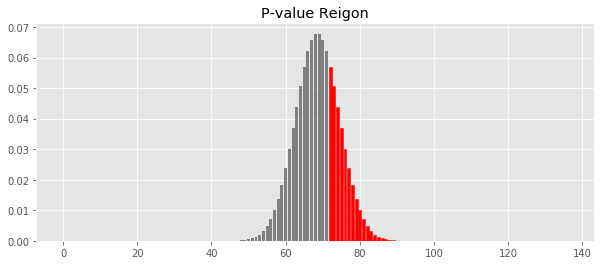

In [56]:
# H0 = she is guessing
# H1 = she is not guessing
binomial = stats.binom(n=137, p=0.5)
prob_equal_or_more_extreme = 1 - binomial.cdf(71)
prob_equal_or_more_extreme
# Fail to reject the H0 at alpha level 0.05

fig, ax = plt.subplots(1, figsize=(10, 4))
bars = ax.bar(range(137), [binomial.pmf(i) for i in range(137)], align="center", color="grey")
for i in range(72, 137):
    bars[i].set_color('red')
    
_ = ax.set_title("P-value Reigon")

2. You are working on your heelflips (a skateboarding trick).  Your goal is to land them more than 50% of the time (as in, the true rate you land them is over one half.  Of course, in any given sample, you may learn more or less than that ideal).   You attempt 122 heelflips in a day, and land 72 of them.  Do you believe you are as good as you want to be?

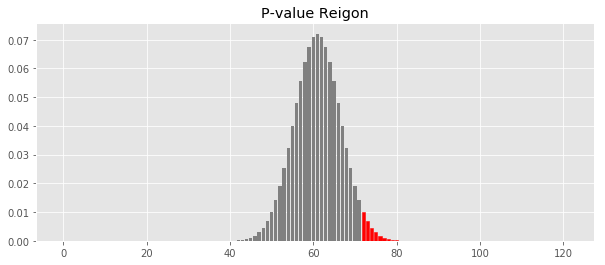

In [57]:
# H0 = landing 61 flips out of 122
# H1 = not landing 61 flips out of 122 
binomial = stats.binom(n=122, p=0.5)
prob_equal_or_more_extreme = 1 - binomial.cdf(71)
prob_equal_or_more_extreme
# Reject H0 at alpha level 0.05

fig, ax = plt.subplots(1, figsize=(10, 4))
bars = ax.bar(range(122), [binomial.pmf(i) for i in range(122)], align="center", color="grey")
for i in range(72, 122):
    bars[i].set_color('red')
    
_ = ax.set_title("P-value Reigon")

3. Buses are seemingly always late, like 90% of them.  Thoroughly dismayed with the state of public transportation, you spend all day collecting data and being just generally upset.  Out of 53 total bus arrivals in a given day at your local bus stop, 49 of them were late.  Is the situation really that bad, 90% of them?

In [58]:
# H0 = busses are late 90%
# H1 = busses are not late 90%
binomial = stats.binom(n=53, p=0.5)
prob_equal_or_more_extreme = 1 - binomial.cdf(48)
prob_equal_or_more_extreme


3.526989811319936e-11